In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
df = pd.read_csv('../data/patient_no_show_dataset.csv', sep=',')

In [10]:
# Label encoding
label_encoder = LabelEncoder()
df_le = df

columns_to_encode = ['gender', 'Ethnicity', 'Socioeconomic Status', 'AppointmentNoshow']
for column in columns_to_encode:
    df_le[f'{column}_encoded'] = label_encoder.fit_transform(df_le[column])
df_le = df_le.drop(columns=columns_to_encode)

In [11]:

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = df_le.drop('AppointmentNoshow_encoded', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, df_le['AppointmentNoshow_encoded'], random_state=42)

# Average CV score on the training set was: 0.6026666666666667
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=14, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print(results)

df_le_testing = testing_features
df_le_testing['predictions'] = results


[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


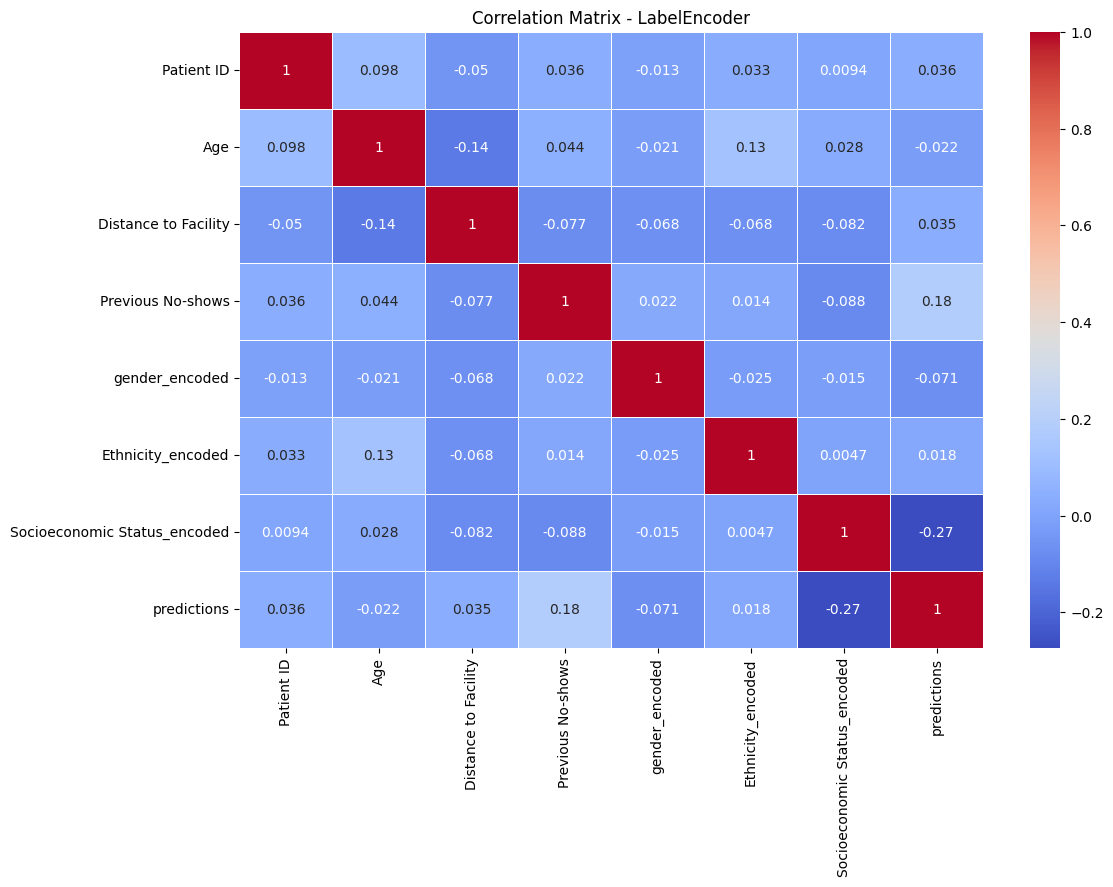

In [18]:
# Generate the correlation matrix
correlation_matrix = df_le_testing.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/tmp/ipykernel_52998/2985408086.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')


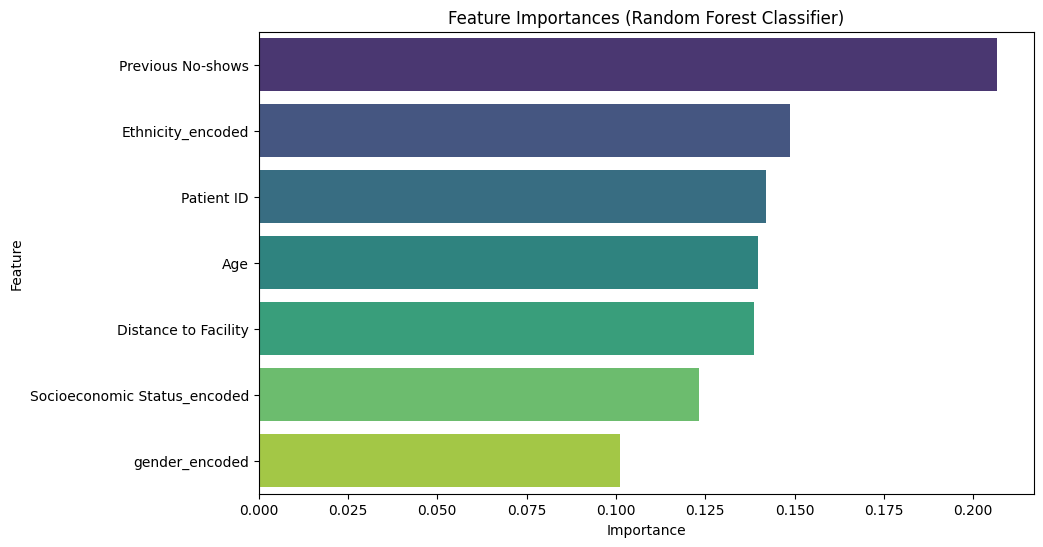

In [25]:
# Get feature importances from the trained model
feature_importances = exported_pipeline.feature_importances_
ExtraTreesClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()